In [1]:
#this first section of the notebook will be used for exploratory data analysis. THe intent is to determine if there can be any potential bias in the dataset. 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline    

In [2]:
# Load the Data
loan = ('./downloads/loan.csv')

In [3]:
# Load the data.
loan = pd.read_csv(loan)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Look at the information regarding its columns.
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# A: Run info to see what how large the datset is. 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [6]:
# A: looking at top headers here
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [7]:
#pulling this later to be used in a dictionary for logistic regression. 
for col in loan.columns: 
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
b

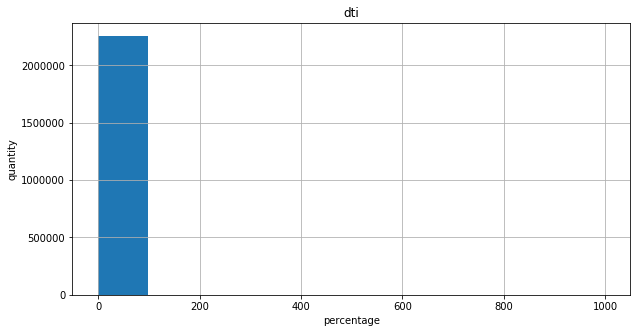

In [8]:
#determining the DTI 
plt.figure(figsize=(10, 5));
loan['dti'].hist();
plt.title('dti');
plt.xlabel('percentage');
plt.ylabel('quantity');

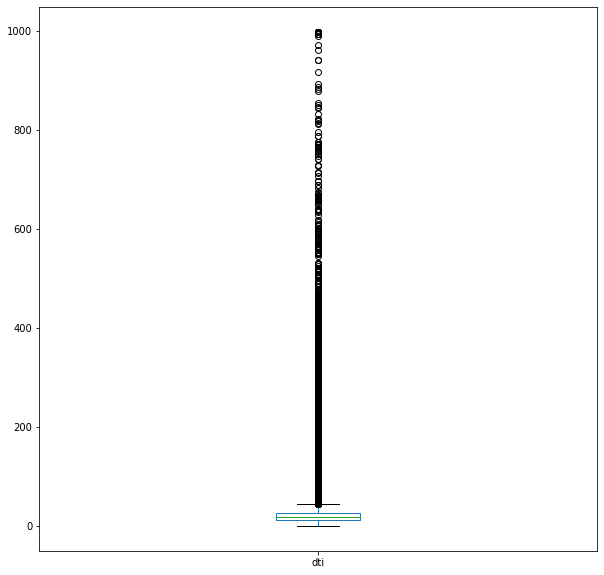

In [9]:
loan.dti.plot(kind='box',figsize=(10,10));

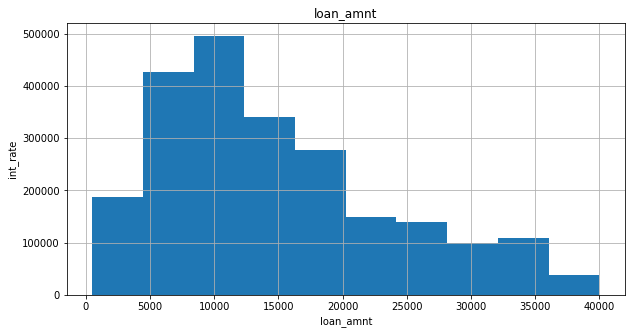

In [10]:
plt.figure(figsize=(10, 5));
loan['loan_amnt'].hist();
plt.title('loan_amnt');
plt.xlabel('loan_amnt');
plt.ylabel('int_rate');

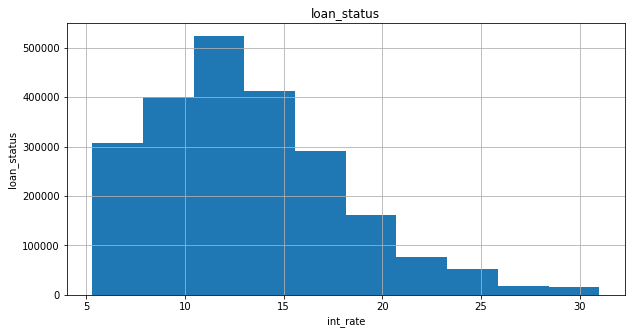

In [11]:
#determining the loan status compared against interest rate. 
plt.figure(figsize=(10, 5));
loan['int_rate'].hist();
plt.title('loan_status');
plt.xlabel('int_rate');
plt.ylabel('loan_status');


In [12]:
loan.int_rate.value_counts()

11.99    53869
5.32     47171
10.99    44165
13.99    43026
11.49    32009
         ...  
24.40        1
22.64        1
17.50        1
16.83        1
11.16        1
Name: int_rate, Length: 673, dtype: int64

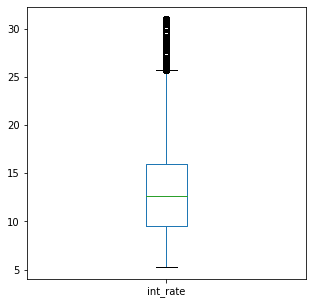

In [13]:
#checking range on interest rate
loan.int_rate.plot(kind='box',figsize=(5,5));

In [14]:
#checking loan amounts 
loan.loan_amnt.value_counts()

10000    187236
20000    131006
15000    123226
12000    121681
35000     86285
          ...  
725           1
750           1
925           1
950           1
850           1
Name: loan_amnt, Length: 1572, dtype: int64

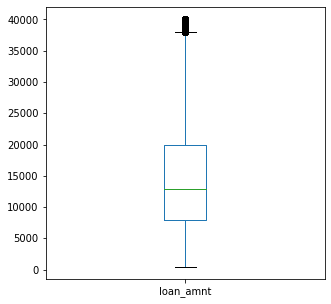

In [15]:
loan.loan_amnt.plot(kind='box',figsize=(5,5));

In [16]:
loan.annual_inc.value_counts()

60000.0    87189
50000.0    76355
65000.0    64903
70000.0    62078
80000.0    59833
           ...  
60637.0        1
60629.0        1
60628.0        1
60627.0        1
48844.0        1
Name: annual_inc, Length: 89368, dtype: int64

In [17]:
#checking correlation between annual income and interest rate

loan.groupby('int_rate').annual_inc.max()

int_rate
5.31     3000000.00
5.32     8900000.00
5.42      480000.00
5.79      198171.96
5.93     1700000.00
            ...    
30.79     400000.00
30.84     650000.00
30.89     600000.00
30.94     350000.00
30.99     450000.00
Name: annual_inc, Length: 673, dtype: float64

In [18]:
#checking loan status to see number of defaults in the dataset
loan.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [19]:
#checking to see max of loan status

loan.groupby('loan_status').acc_now_delinq.max()

loan_status
Charged Off                                             6.0
Current                                                 7.0
Default                                                 0.0
Does not meet the credit policy. Status:Charged Off     0.0
Does not meet the credit policy. Status:Fully Paid      1.0
Fully Paid                                             14.0
In Grace Period                                         1.0
Late (16-30 days)                                       2.0
Late (31-120 days)                                      2.0
Name: acc_now_delinq, dtype: float64

In [20]:
#checking the average percentages for loan status 

loan.groupby('loan_status').acc_now_delinq.mean()

loan_status
Charged Off                                            0.005702
Current                                                0.002850
Default                                                0.000000
Does not meet the credit policy. Status:Charged Off    0.000000
Does not meet the credit policy. Status:Fully Paid     0.002039
Fully Paid                                             0.004911
In Grace Period                                        0.002681
Late (16-30 days)                                      0.005887
Late (31-120 days)                                     0.004430
Name: acc_now_delinq, dtype: float64

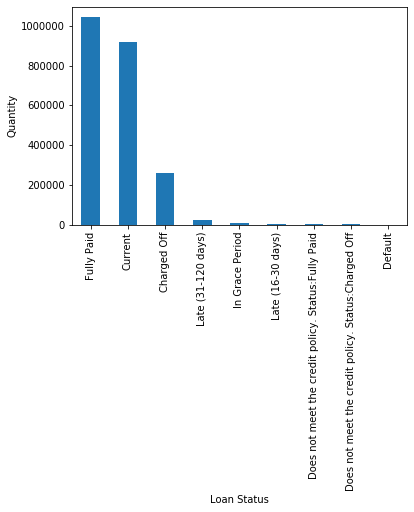

In [21]:
# Answer: Ploating Loan Status and quanitty to determine overall percentage
ax = loan.loan_status.value_counts().plot(kind='bar');
ax.set_xlabel("Loan Status");
ax.set_ylabel("Quantity");

In [22]:
#checking how many lendees filed for hardship during the loan process
loan.hardship_flag.value_counts()

N    2259783
Y        885
Name: hardship_flag, dtype: int64

In [23]:
#filling the datasets null values for use in logistic regressions and decision tree modelling 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [24]:
#createing this list to use in a dictionary for Logistic regresison 

list(loan.columns) 

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [25]:
#determining the most popular reasons for loans

loan.purpose.value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

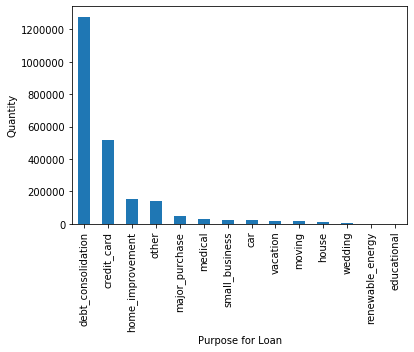

In [26]:
# Answer: 
ax = loan.purpose.value_counts().plot(kind='bar');
ax.set_xlabel("Purpose for Loan");
ax.set_ylabel("Quantity");

In [27]:
loan.hardship_flag.value_counts()

N    2259783
Y        885
Name: hardship_flag, dtype: int64

In [28]:
#determining if there is an even distribution of loans across the US to help determine if there is bias. 

loan.addr_state.value_counts()
    

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

In [29]:
#checking occupation 

loan.emp_title.value_counts()

Teacher                           38824
Manager                           34298
Owner                             21977
Registered Nurse                  15867
Driver                            14753
                                  ...  
Family Services Specialist 3          1
W.E. Bowers                           1
Western Plains Medical Complex        1
Financial Literacy Counselor          1
First Advantage/Staffworks            1
Name: emp_title, Length: 512694, dtype: int64

In [30]:
#checking the grade of each loan
loan.grade.value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

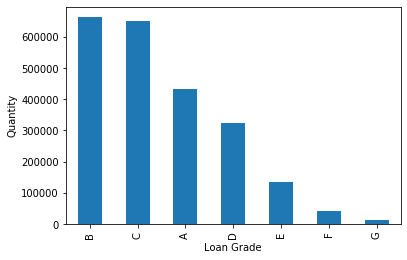

In [31]:
ax = loan.grade.value_counts().plot(kind='bar');
ax.set_xlabel("Loan Grade");
ax.set_ylabel("Quantity");

In [32]:
#this is the start of exploratory analysis through a logistic regression

In [33]:
#creating a dictionary to use in the logistic regression 
loan.columns = [ 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 
'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 
'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 
'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
'total_il_high_credit_limit',  'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 
'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 
'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 
'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', ]

In [34]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['int_rate']
X = loan[feature_cols]
y = loan.loan_status

logreg.fit(X,y)
pred = logreg.predict(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
logreg.predict_proba(X)[0:10]

array([[1.10905357e-01, 4.09961662e-01, 1.82658570e-05, 3.42450164e-04,
        8.97969820e-04, 4.63263087e-01, 3.85721865e-03, 1.58919200e-03,
        9.16479759e-03],
       [1.86121028e-01, 3.76686521e-01, 1.56641141e-05, 4.50507991e-04,
        1.06943347e-03, 4.12170739e-01, 5.85149179e-03, 2.51566217e-03,
        1.51189531e-02],
       [1.70646459e-01, 3.83739065e-01, 1.61524499e-05, 4.30060653e-04,
        1.03937488e-03, 4.22502685e-01, 5.44456312e-03, 2.32274943e-03,
        1.38588904e-02],
       [1.86121028e-01, 3.76686521e-01, 1.56641141e-05, 4.50507991e-04,
        1.06943347e-03, 4.12170739e-01, 5.85149179e-03, 2.51566217e-03,
        1.51189531e-02],
       [1.43678941e-01, 3.95793720e-01, 1.70520919e-05, 3.92515304e-04,
        9.81291440e-04, 4.40698157e-01, 4.73429914e-03, 1.99067008e-03,
        1.17133541e-02],
       [1.28687619e-01, 4.02347978e-01, 1.75871031e-05, 3.70326793e-04,
        9.45197532e-04, 4.50946477e-01, 4.33601238e-03, 1.80713803e-03,
        1.0

In [36]:
logreg.predict_proba(X)[0:1]

array([[1.10905357e-01, 4.09961662e-01, 1.82658570e-05, 3.42450164e-04,
        8.97969820e-04, 4.63263087e-01, 3.85721865e-03, 1.58919200e-03,
        9.16479759e-03]])

In [53]:
#filling null values to use in the logsitic regression to see if Debt to income ratio (DTI) can be used as a predictor for defaults
loan = loan.fillna(0)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0.0,0.0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
1,0.0,0.0,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
2,0.0,0.0,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
3,0.0,0.0,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
4,0.0,0.0,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,0.0,0.0,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
2260664,0.0,0.0,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
2260665,0.0,0.0,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0
2260666,0.0,0.0,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,0.0,0.0,Cash,N,0,0,0,0.0,0.0,0.0


In [54]:
#limiting the file size

loan1 = loan[:400000]

In [55]:
#Decision Tree Modelling
# Encode current as 0 and default as 1.
loan1['loan_status'] = loan1.loan_status.map({'current':0, 'default':1})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
# Define X and y.

X = loan1[feature_cols]
y = loan1.dti

In [57]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [58]:
# Try different values one by one.
from sklearn.model_selection import cross_val_score
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

19.963933367210483